In [1]:
from read_data import read_csv_dir, clean_data

In [2]:
path = 'outputs'
df = read_csv_dir(path)
df['clean_data'] = df['Embedded_text'].apply(clean_data)

In [3]:
clean_data()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,clean_data
0,Sam Bowman,@s8mb,2021-01-01T13:23:18.000Z,Sam Bowman\n@s8mb\n·\n2021年1月1日,Good question \n@allisonpearson\n! What did th...,NaN,"2,987",3.2万,11.5万,['https://pbs.twimg.com/media/Eqphe91XYAEWthd?...,https://twitter.com/s8mb/status/13449976294161...,Good question \n@allisonpearson\n! What did th...
1,Zeniet,@Zeniiet,2021-01-01T20:23:49.000Z,Zeniet\n@Zeniiet\n·\n2021年1月2日,Photos in Genshin exhibition event that's take...,NaN,52,"1,801",1万,['https://pbs.twimg.com/media/EqrEdVCVgAEzyGy?...,https://twitter.com/Zeniiet/status/13451034548...,Photos in Genshin exhibition event that's take...
2,Charlie Kirk,@charliekirk11,2021-01-01T02:02:42.000Z,Charlie Kirk\n@charliekirk11\n·\n2021年1月1日,This is how they celebrate the New Year in Wuh...,NaN,"1,701","7,713",1.8万,['https://pbs.twimg.com/media/EqlelYZXUAAfxed....,https://twitter.com/charliekirk11/status/13448...,This is how they celebrate the New Year in Wuh...
3,One America News,@OANN,2021-01-01T17:28:00.000Z,One America News\n@OANN\n·\n2021年1月2日,Tech expert reveals Ga. voting machines connec...,NaN,218,"2,152","5,868",['https://pbs.twimg.com/media/EqqcEmAVEAAxSlM?...,https://twitter.com/OANN/status/13450592094700...,Tech expert reveals Ga. voting machines connec...
4,Ryan Fournier,@RyanAFournier,2021-01-01T23:39:37.000Z,Ryan Fournier\n@RyanAFournier\n·\n2021年1月2日,China was the only major country to have econo...,NaN,413,"4,147",1.6万,[],https://twitter.com/RyanAFournier/status/13451...,China was the only major country to have econo...
5,zerohedge,@zerohedge,2021-01-01T00:43:22.000Z,zerohedge\n@zerohedge\n·\n2021年1月1日,*NYSE TO DELIST THREE CHINESE COMPANIES ON U.S...,NaN,80,421,"2,168",[],https://twitter.com/zerohedge/status/134480638...,*NYSE TO DELIST THREE CHINESE COMPANIES ON U.S...
6,mjf. #LIMBO,@menjunfei,2021-01-01T08:13:32.000Z,mjf. #LIMBO\n@menjunfei\n·\n2021年1月1日,there was an anti made rumors in douban (the f...,NaN,84,"7,749",1.1万,[],https://twitter.com/menjunfei/status/134491967...,there was an anti made rumors in douban (the f...
7,Shefali Vaidya.,@ShefVaidya,2021-01-01T02:52:49.000Z,Shefali Vaidya.\n@ShefVaidya\n·\n2021年1月1日,Hoping 2021 gets rid of the Made in China viru...,NaN,90,213,"3,045",[],https://twitter.com/ShefVaidya/status/13448389...,Hoping 2021 gets rid of the Made in China viru...
8,Mark Lutchman,@marklutchman,2021-01-01T14:33:14.000Z,Mark Lutchman\n@marklutchman\n·\n2021年1月1日,Times Square on New Years 2021... totally empt...,NaN,202,"1,348","5,423",[],https://twitter.com/marklutchman/status/134501...,Times Square on New Years 2021... totally empt...
9,Paul Meek,@PaulMeekPerth,2021-01-01T03:39:59.000Z,Paul Meek\n@PaulMeekPerth\n·\n2021年1月1日,Can't do climate change. Can't do diplomacy wi...,NaN,91,762,"2,528",[],https://twitter.com/PaulMeekPerth/status/13448...,Can't do climate change. Can't do diplomacy wi...


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv('res.csv')
contents = [' '.join(eval(i)) for i in df['tokens'].to_list()]
# print(contents)

In [2]:
tfidf = TfidfVectorizer(ngram_range=(1, 3))

In [3]:
x = tfidf.fit_transform(contents)

In [7]:
# model = LatentDirichletAllocation(n_components=6, max_iter=50, learning_method='online', learning_offset=50, random_state=42)

model = LatentDirichletAllocation(n_components=10, random_state=42)
model.fit(x)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [8]:
featute_names = tfidf.get_feature_names()
rows = []
for topic in model.components_:
    topwords = [featute_names[i] for i in topic.argsort()[: -10-1:-1]]
    rows.append(topwords)

In [9]:
for idx, row in enumerate(rows):
    print(f'topic :{idx+1}')
    print(row)

topic :1
['china', 'chinese', 'us', 'biden', 'people', 'russia', 'world', 'new', 'covid', 'spy']
topic :2
['china', 'chinese', 'us', 'ericswalwell', 'people', 'russia', 'world', 'ronfilipkowski', 'india', 'like']
topic :3
['china', 'chinese', 'biden', 'us', 'people', 'russia', 'one', 'fine china', 'fine', 'guests']
topic :4
['china', 'chinese', 'potus', 'biden', 'russia', 'us', 'people', 'subtitles', 'subtitles available', 'available']
topic :5
['china', 'chinese', 'us', 'biden', 'people', 'russia', 'world', 'india', 'communist', 'new']
topic :6
['china', 'elonmusk', 'chinese', 'repswalwell', 'us', 'biden', 'india', 'new', 'russia', 'covid']
topic :7
['china', 'chinese', 'biden', 'us', 'india', 'people', 'covid', 'like', 'russia', 'new']
topic :8
['china', 'chinese', 'chinese new year', 'chinese new', 'new', 'new year', 'happy chinese', 'happy chinese new', 'year', 'us']
topic :9
['china', 'chinese', 'us', 'india', 'russia', 'people', 'country', 'world', 'biden', 'new']
topic :10
['chi

In [25]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [32]:
data = df['Embedded_text']

In [34]:
data_words = [gensim.utils.simple_preprocess(str(i)) for i in data]

In [36]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [63]:
data_words = [i.split(' ') for i in contents]

data_dic = corpora.Dictionary(data_words)

In [64]:
model = gensim.models.ldamodel.LdaModel(corpus=[data_dic.doc2bow(i) for i in data_words], id2word=data_dic, num_topics=10, random_state=42)

In [65]:
for i in model.print_topics():
    print(i)

(0, '0.042*"china" + 0.018*"chinese" + 0.010*"us" + 0.008*"would" + 0.007*"xi" + 0.007*"one" + 0.006*"india" + 0.006*"ukraine" + 0.005*"like" + 0.005*"country"')
(1, '0.049*"china" + 0.026*"chinese" + 0.014*"biden" + 0.011*"us" + 0.010*"taiwan" + 0.009*"trump" + 0.007*"russia" + 0.007*"spy" + 0.007*"ukraine" + 0.007*"war"')
(2, '0.050*"china" + 0.026*"balloon" + 0.014*"chinese" + 0.013*"people" + 0.012*"biden" + 0.007*"million" + 0.007*"like" + 0.006*"american" + 0.005*"covid" + 0.005*"trump"')
(3, '0.066*"chinese" + 0.016*"china" + 0.007*"shoot" + 0.006*"one" + 0.005*"vs" + 0.004*"korean" + 0.004*"members" + 0.004*"app" + 0.004*"minister" + 0.004*"phone"')
(4, '0.033*"chinese" + 0.027*"china" + 0.008*"trillion" + 0.008*"spy" + 0.008*"foundation" + 0.007*"us" + 0.006*"media" + 0.006*"covid" + 0.004*"according" + 0.004*"brics"')
(5, '0.051*"china" + 0.023*"india" + 0.021*"us" + 0.019*"russia" + 0.011*"chinese" + 0.008*"people" + 0.007*"world" + 0.007*"japan" + 0.007*"france" + 0.007*"uk

In [1]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np

In [3]:
words = []
for i in df['tokens']:
    words.extend(eval(i))

In [4]:
words = Counter(words)

In [5]:
words = {k: v for k, v in words.items() if v > 5}

In [9]:
mask = Image.open('background.jpg').convert('RGB')

In [14]:
wd = WordCloud(background_color='white', mask=np.array(mask))

In [15]:
wd.generate_from_frequencies(words)

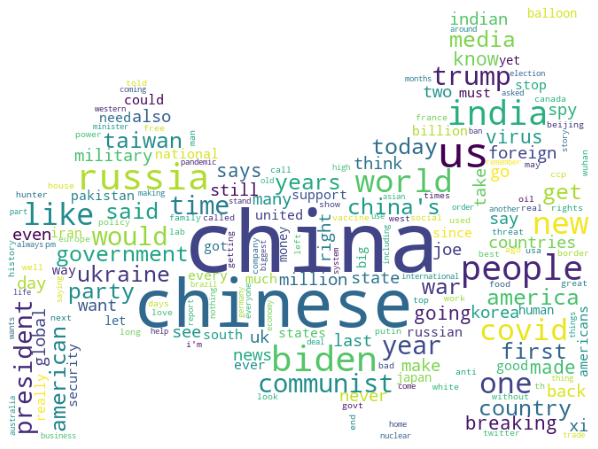

In [18]:
plt.figure(figsize=(16, 8))
plt.axis('off')
plt.imshow(wd)

In [16]:
tmp = pd.DataFrame(words.items(), columns=['word', 'count'])

In [18]:
tmp.to_excel('words_count.xlsx', index=False)

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df = pd.read_csv('res_sentiment.csv')

In [3]:
neg_df = df[df['sentiment'] == -1]
pos_df = df[df['sentiment'] == 1]

In [ ]:
import pandas as pd



df = pd.read_csv('res.csv')
contents = [' '.join(eval(i)) for i in df['tokens'].to_list()]
# print(contents)

In [8]:
df['sentiment'].value_counts()

 0    5315
-1    4983
 1    1371
Name: sentiment, dtype: int64

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv('res_sentiment.csv')
neg_df = df[df['sentiment'] == -1]
pos_df = df[df['sentiment'] == 1]

def topic_analysis(df, n_components, top_n):
    contents = [' '.join(eval(i)) for i in df['tokens'].to_list()]
    tfidf = TfidfVectorizer(ngram_range=(1, 3))
    x = tfidf.fit_transform(contents)
    model = LatentDirichletAllocation(n_components=n_components, random_state=42)
    model.fit(x)
    featute_names = tfidf.get_feature_names()
    rows = []
    for topic in model.components_:
        topwords = [featute_names[i] for i in topic.argsort()[: -top_n - 1:-1]]
        rows.append(topwords)
    for idx, row in enumerate(rows):
        print(f'topic :{idx + 1}')
        print(row)

print('positive')
topic_analysis(pos_df, 10, 10)
print('negtive')
topic_analysis(neg_df, 10, 10)

positive
topic :1
['china', 'welcome china', 'welcome', 'chinese', 'world', 'happy', 'us', 'good', 'great', 'good china']
topic :2
['china', 'chinese', 'best', 'autumn', 'love', 'new', 'album', 'year', 'thank', 'beauty autumn']
topic :3
['new year', 'chinese new year', 'chinese new', 'happy chinese new', 'happy chinese', 'year', 'new', 'happy', 'chinese', 'china']
topic :4
['china', 'best', 'kpop', 'best selling', 'selling', 'chinese', 'selling kpop', 'best selling kpop', 'china year', 'champ']
topic :5
['things happening china', 'happening china', 'things happening', 'happening', 'china', 'things', 'incredible things', 'incredible things happening', 'incredible', 'chinese']
topic :6
['chinese', 'china', 'love', 'like', 'one', 'album', 'made', 'first', 'thank', 'year']
topic :7
['china', 'chinese', 'best', 'best selling', 'selling', 'year', 'food', 'digital', 'like', 'world']
topic :8
['china', 'chinese', 'new', 'first', 'rank', 'happy', 'us', 'jimin bts', 'congratulations jimin bts', 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('res_sentiment.csv')

In [4]:
df.columns

Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL',
       'clean_data', 'tokens', 'sentiment'],
      dtype='object')

In [7]:
tmp = df[['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text', 'Emojis', 'Image link', 'Tweet URL', 'sentiment']]

In [11]:
tmp[tmp['sentiment'] == 0].to_excel('neutral.xlsx', index=False)